In [1]:
import sys
sys.path.append('../src/')
from train import *

## Test dataset.py

In [12]:
dataset="lilac"
current, voltage, labels = get_data(submetered=False, data_type=dataset, isc=False)
labels = get_correct_labels_lilac(labels)

#perform label enconding
le = LabelEncoder()
le.fit(labels)
y = le.transform(labels)

skf = StratifiedKFold(n_splits=4,random_state=42,shuffle=True)
train_index, test_index = next(skf.split(current, y))

input_feature = generate_input_feature(current, voltage, image_type="adaptive", width=30, multi_dimension=True)
Xtrain, Xtest = input_feature[train_index], input_feature[test_index]
ytrain, ytest = y[train_index], y[test_index]

tra_loader, val_loader=get_loaders(Xtrain, Xtest, ytrain, ytest, batch_size=16)
print("Load LILAC data successfully.")

0it [00:00, ?it/s]

Load lilac aggregated data from ../data/lilac/aggregated/


processed: 1324: : 1324it [08:17,  2.66it/s]

Load LILAC data successfully.


## Test Train.py

In [2]:
# get_user_inputs()
dataset, image_type, eps, delta, width = get_user_inputs()

Input l for lilac, p for plaid)l
Input a for AWRG, v for VI-graptha
Input epsilon (suggest 10):10
Input delta (suggest 10):10
Input width (suggest 50):50


In [2]:
# create_trainer()
dataset = 'lilac'
image_type = 'adaptive'
eps = 10
delta = 10
width = 50
batch_size = 16
num_class, trainer = create_trainer(dataset=dataset, image_type=image_type, multi_dimension=True, batch_size=batch_size, 
                                    width=width, eps=eps, delta=delta)

processed: 7: : 6it [00:00, 59.09it/s]

Load lilac aggregated data from ../data/lilac/aggregated/
correct labels for some appliances


processed: 1324: : 1324it [00:19, 67.11it/s]


Trainer for lilac created.


Epoch 19: 100%|██████████| 63/63 [01:15<00:00,  1.20s/it, loss=0.060, score=0.992]


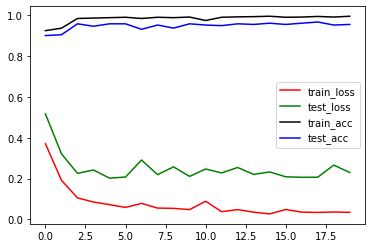

In [3]:
# train_the_model()
epochs = 20
checkpoint, file_name = train_the_model(trainer, dataset, image_type, epochs, width, multi_dimension=True)
plot_learning_curve(file_name)

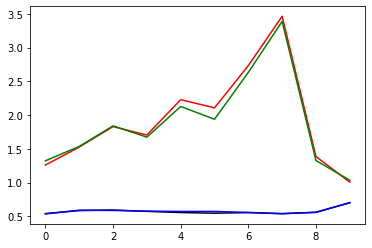

AttributeError: 'tuple' object has no attribute 'load_saved_model'

In [5]:
# test_the_model()
test_the_model(trainer, num_class, checkpoint,file_name)


In [4]:
file_name = 'lilac_adaptive_50'
plot_learning_curve(file_name)
# train_the_model()
epochs = 10
checkpoint = train_the_model(trainer, dataset, image_type, epochs, width, multi_dimension=True)

Epoch 9: 100%|██████████| 63/63 [00:02<00:00, 27.27it/s, loss=0.399, score=0.865]


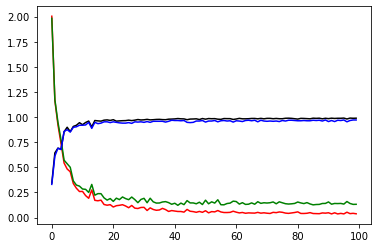

In [6]:
file_name = 'plaid_adaptive_50'
plot_learning_curve(file_name)

In [5]:
# test_the_model()
test_the_model(trainer, num_class, checkpoint)

In [1]:
import sys
sys.path.append('../src/')
from train import *
dataset = 'lilac'
image_type = 'adaptive'
eps = 10
delta = 10
width = 50
batch_size = 16

# create_trainer()
model_name = 'EffiNet_small'
num_class, trainer = create_trainer(dataset=dataset, image_type=image_type, model_name=model_name, multi_dimension=True, batch_size=batch_size, 
                                    width=width, eps=eps, delta=delta)

# train_the_model()
epochs = 2
checkpoint_es, file_name_es = train_the_model(trainer, dataset, image_type, model_name, epochs, width, multi_dimension=True)
plot_learning_curve(file_name_es)

# test_the_model()
test_the_model(trainer, num_class, checkpoint_es,file_name_es)

processed: 12: : 11it [00:00, 85.28it/s]

Load lilac aggregated data from ../data/lilac/aggregated/
correct labels for some appliances


processed: 1324: : 1324it [00:15, 84.84it/s]
Epoch 0:   0%|          | 0/63 [00:00<?, ?it/s]

Trainer for lilac created.


Epoch 1: 100%|██████████| 63/63 [00:13<00:00,  4.65it/s, loss=2.339, score=0.348]


<Figure size 640x480 with 1 Axes>